In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)

D:\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sk

In [3]:
data.columns = boston.feature_names

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data['PRICE'] = boston.target

In [5]:
data['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [6]:
# multivariate analysis

In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
data['PRICE'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

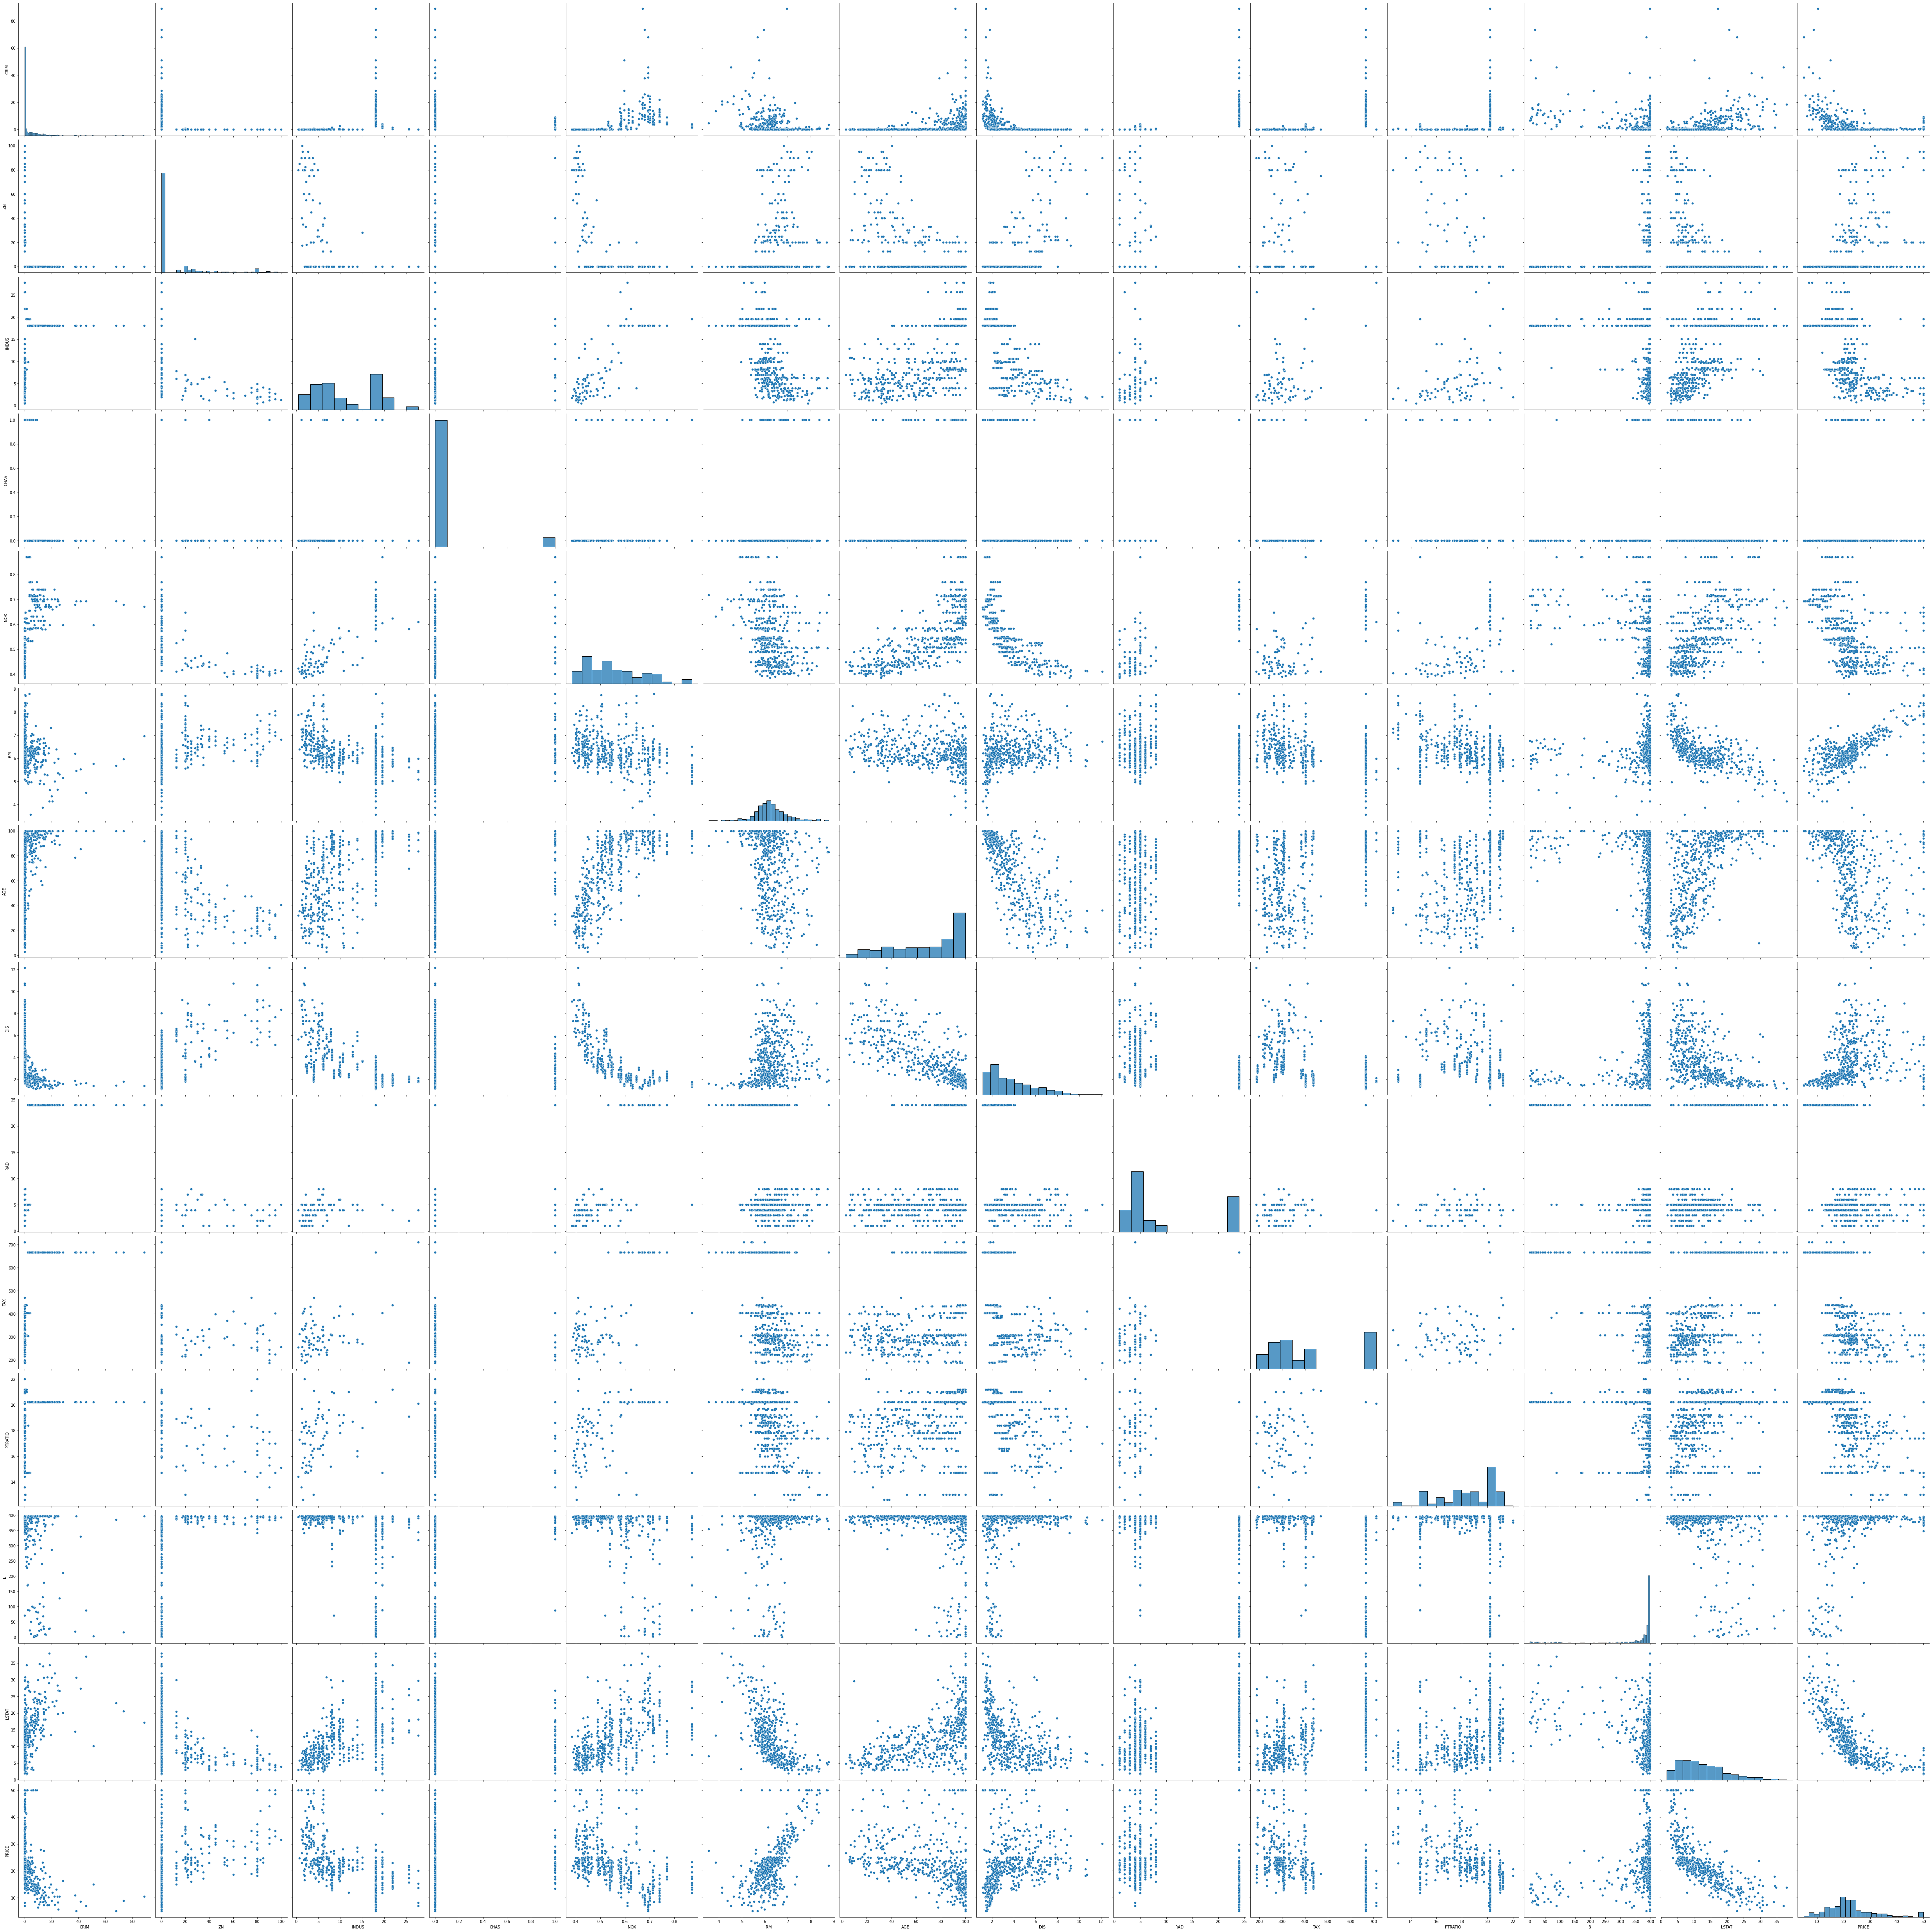

In [9]:
sns.pairplot(data,height=5)

In [10]:
x = data['RM']
y = data['PRICE']

Text(0, 0.5, 'PRICE')

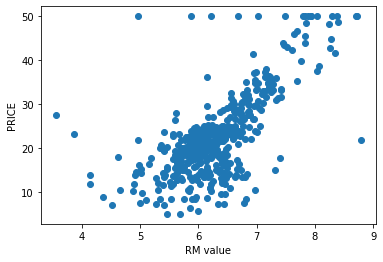

In [11]:
plt.scatter(x,y)
plt.xlabel('RM value')
plt.ylabel('PRICE')

In [5]:
x = data.iloc[:,5]
x

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [13]:
y = data.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
x_test

,RM
224,8.266
137,6.454
453,7.393
303,6.982
254,6.108
...,...
434,6.208
294,6.009
306,7.420
463,6.513


In [19]:
y_test

224    44.8
137    17.1
453    17.8
303    33.1
254    21.9
       ... 
434    11.7
294    21.7
306    33.4
463    20.2
332    19.4
Name: PRICE, Length: 102, dtype: float64

In [20]:
lr.predict(x_test.iloc[4].values.reshape(1,1))

D:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.92446092])

In [21]:
l = lr.predict(x_train)

Text(0, 0.5, 'PRICE')

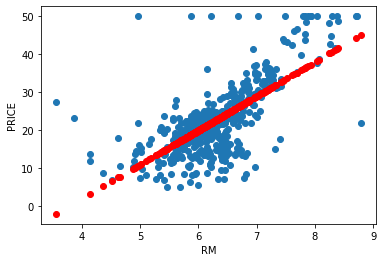

In [22]:
plt.scatter(x,y)
plt.scatter(x_train,l,color='red')
plt.xlabel('RM')
plt.ylabel('PRICE')

In [23]:
m = lr.coef_

In [24]:
b = lr.intercept_

In [25]:
# finding predicted values

In [26]:
m * 6.12 + b

array([21.03260031])

In [27]:
m * 8.58 + b

array([43.20117553])

In [28]:
m * 4.93 + b

array([10.30877734])

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
y_pred = lr.predict(x_test)

In [31]:
y_test.values

array([44.8, 17.1, 17.8, 33.1, 21.9, 21. , 18.4, 10.4, 23.1, 20. , 15.7,
       41.3, 33.3, 30.7,  8.5,  6.3, 21.2, 16.2, 15.6, 24.1, 23.9, 50. ,
       23.2, 23.4, 12.8, 24.6, 18.8, 16.1, 18.2, 24.3, 14.8, 37.3, 21.4,
       18.6, 18.8, 13.9, 24.5, 31.5, 18.2, 20.7, 19.4,  9.7, 21.5, 14.9,
       21.7, 26.5, 20.7, 19.3, 24.5, 19.3, 26.6, 23. , 45.4, 19.8, 22.7,
       23.1, 50. , 17.8, 29.1, 19.2, 22.7, 21.2, 37.2, 31.6, 16.1, 22.2,
       34.9, 20.5, 28. , 29.1, 24.7, 22. , 15.6, 37. , 11.8, 21.7, 19.4,
       23.3, 16.5, 16.7, 23.9, 15.2, 11.9, 19.9, 22.8, 11.3, 25.2, 11.5,
       22. , 21.6, 19.9, 16.8, 19.3, 50. , 29.4, 13.3, 50. , 11.7, 21.7,
       33.4, 20.2, 19.4])

In [32]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 4.365257521734308


In [33]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 35.40560537877825


In [34]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 5.950260950477571


In [35]:
print("r2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2 score 0.5721625318143688


In [36]:
# Adjusted R2 score

In [37]:
x_test.shape

(102, 1)

In [38]:
1 - ((1-r2)*(102-1)/(102-1-1))

0.5678841571325126

In [40]:
new_data = data.copy()
new_data['random_feature'] = np.random.random(506)

new_data = new_data[['RM','random_feature','PRICE']]
new_data.head()

,RM,random_feature,PRICE
0,6.575,0.408517,24.0
1,6.421,0.538277,21.6
2,7.185,0.684487,34.7
3,6.998,0.851452,33.4
4,7.147,0.003893,36.2


Text(0, 0.5, 'price')

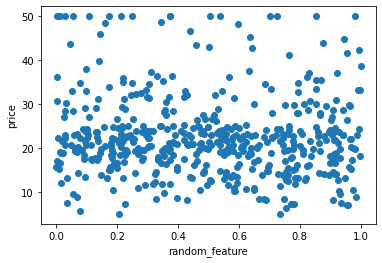

In [41]:
plt.scatter(new_data['random_feature'],new_data['PRICE'])
plt.xlabel('random_feature')
plt.ylabel('price')

In [48]:
x = new_data.iloc[:,0:2]
y = new_data.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test)

In [53]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.5545847848485883


In [54]:
1 - ((1-r2)*(506-1)/(506-1-2))

0.5528137501958987